Derivada direccional y gradiente. 

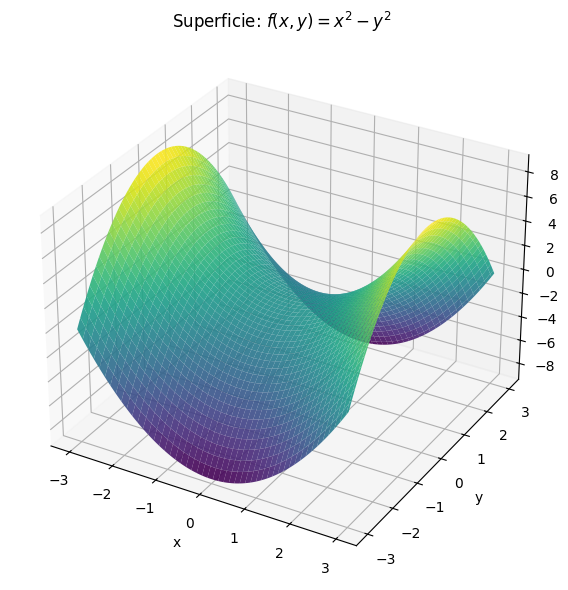

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para gráficos 3D

# Función silla
def f(x, y):
    return x**2 - y**2

# Malla
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Figura 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# Etiquetas y título
ax.set_title(r'Superficie: $f(x,y)=x^2 - y^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.tight_layout()
plt.show()


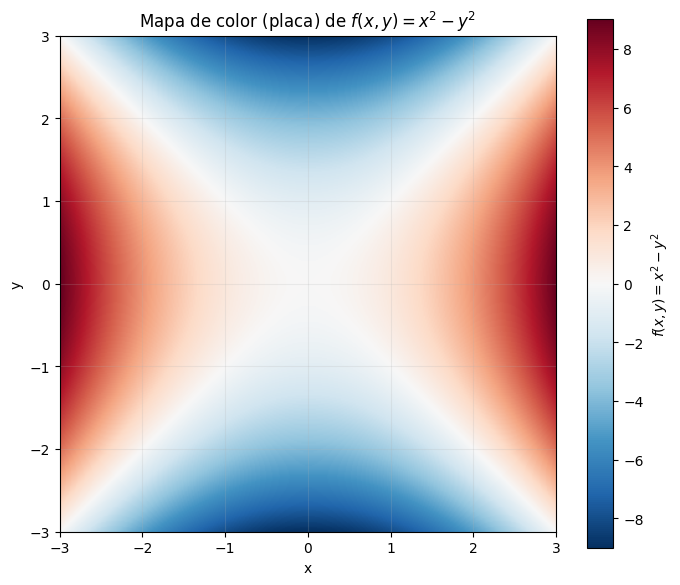

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función silla
def f(x, y):
    return x**2 - y**2

# Malla
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig, ax = plt.subplots(figsize=(7, 6))
im = ax.imshow(
    Z,
    extent=[x.min(), x.max(), y.min(), y.max()],
    origin='lower',
    aspect='equal',
    cmap='RdBu_r'  
)

# Barra de color
cbar = plt.colorbar(im, ax=ax, label=r'$f(x,y)=x^2 - y^2$')

# Etiquetas y título
ax.set_title('Mapa de color (placa) de $f(x,y)=x^2 - y^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(alpha=0.2)

plt.tight_layout()
plt.show()


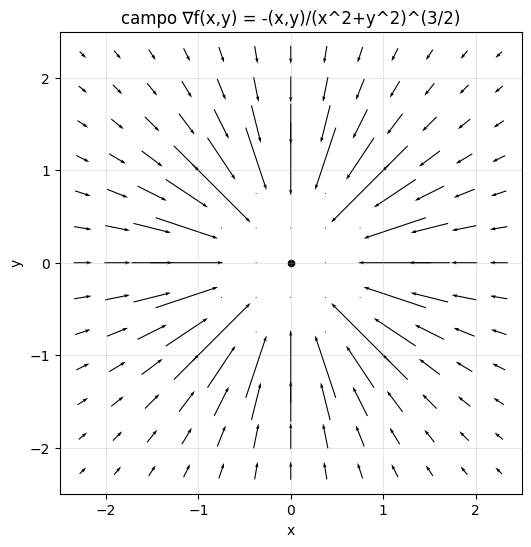

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# dominio
x_min, x_max = -2.5, 2.5
y_min, y_max = -2.5, 2.5
n = 41

x = np.linspace(x_min-5, x_max+5, n)
y = np.linspace(y_min-5, y_max+5, n)
X, Y = np.meshgrid(x, y)

# campo gradiente en r^2
eps = 1e-3
R2 = X**2 + Y**2
R = np.sqrt(R2)

U = np.zeros_like(X)
V = np.zeros_like(Y)

r0 = 1  
mask = R >= r0


den = (R2 * R)
U[mask] = -X[mask] / den[mask]
V[mask] = -Y[mask] / den[mask]

# grafica quiver
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, pivot='mid', angles='xy', scale_units='xy', scale=1.0)
plt.scatter([0], [0], c='k', s=20)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("campo ∇f(x,y) = -(x,y)/(x^2+y^2)^(3/2)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()


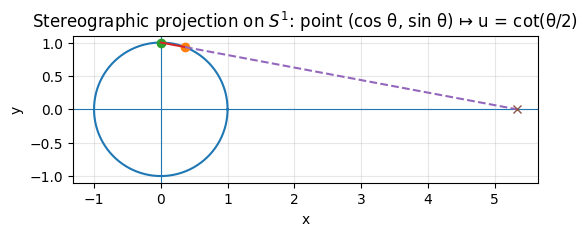

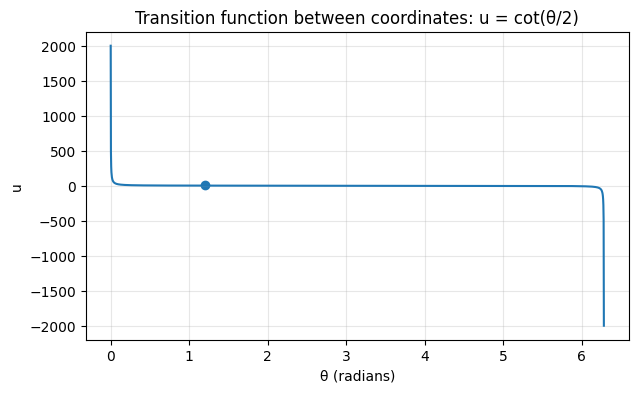

chosen θ (rad): 1.2
point on circle: (0.3623577544766736, 0.9320390859672263)
stereographic u: 5.331855223458721
reconstruction error from u back to S1: 2.220446049250313e-16


In [9]:
# mini demo: stereographic parametrizations on S1 and smooth transition with angular coords
import numpy as np
import matplotlib.pyplot as plt

# ----- pick an example point by angle theta (avoid poles) -----
theta = 1.2  # radians, in (0, 2π) \ {0, π}
x, y = np.cos(theta), np.sin(theta)

# stereographic from north pole: u = x/(1 - y)
u = x / (1 - y)

# inverse map from u back to circle
x_u = 2*u/(1+u*u)
y_u = (u*u - 1)/(1+u*u)

# verify numerically they match the chosen point (up to small error)
err = np.hypot(x - x_u, y - y_u)

# ----- figure 1: circle, point, north pole, projection line, and u on x-axis -----
R = 1.0
t = np.linspace(0, 2*np.pi, 400)
Xc, Yc = R*np.cos(t), R*np.sin(t)

plt.figure(figsize=(6,6))
plt.plot(Xc, Yc)
plt.axhline(0, linewidth=0.8)
plt.axvline(0, linewidth=0.8)
# point on circle
plt.plot([x], [y], marker='o')
# north pole
plt.plot([0], [1], marker='o')
# projection line from north pole to point, extended to x-axis (y=0)
# parametric line N + s*(P - N)
N = np.array([0.0, 1.0])
P = np.array([x, y])
dir_vec = P - N
s_to_axis = -N[1] / dir_vec[1]  # solve y=0
Q = N + s_to_axis * dir_vec  # intersection with x-axis
# draw the segment N->P and P->Q for clarity
plt.plot([N[0], P[0]], [N[1], P[1]])
plt.plot([P[0], Q[0]], [P[1], Q[1]], linestyle='--')
# mark u on x-axis
plt.plot([u], [0], marker='x')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Stereographic projection on $S^1$: point (cos θ, sin θ) ↦ u = cot(θ/2)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.show()

# ----- figure 2: transition between angular θ and stereographic u -----
# use θ in (0, 2π) excluding the poles
theta_grid = np.linspace(1e-3, 2*np.pi-1e-3, 2000)
u_grid = 1/np.tan(theta_grid/2)  # u = cot(θ/2)

plt.figure(figsize=(7,4))
plt.plot(theta_grid, u_grid)
plt.scatter([theta], [u])
plt.title("Transition function between coordinates: u = cot(θ/2)")
plt.xlabel("θ (radians)")
plt.ylabel("u")
plt.grid(True, alpha=0.3)
plt.show()

# print example numbers for reference
print("chosen θ (rad):", theta)
print("point on circle:", (x, y))
print("stereographic u:", u)
print("reconstruction error from u back to S1:", float(err))
